<a href="https://colab.research.google.com/github/jcdumlao14/Projects/blob/main/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"England Climate Anomaly Detection"**

England is known for its unpredictable weather patterns, and climate change has made it even more challenging to forecast the weather accurately. To help identify unusual weather patterns and detect potential outliers, an anomaly detection model has been built using historical weather data. This model will allow climate scientists to examine extreme weather events and study their impact on the environment. The results of the analysis will be used to inform policymakers and help communities prepare for future weather extremes. The England Climate Anomaly Detection project is an important step in understanding the impact of climate change on the weather patterns in the region.

what is climate anomaly detection?

Climate anomaly detection is the process of identifying unusual or abnormal patterns in climate data, which may indicate a deviation from the expected behavior of the climate. This can involve detecting extreme weather events, changes in temperature or precipitation patterns, or other anomalies that may indicate shifts in the climate. The goal of anomaly detection is to identify these deviations early on, so that appropriate measures can be taken to adapt to the changing climate and mitigate potential impacts. Machine learning and statistical methods are often used to analyze climate data and detect anomalies.

# **Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns

#For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import datetime as dt
from datetime import timedelta
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

# **Load the Data**

In [ ]:
# Load the data
df = pd.read_csv('/content/EnglandWeather.csv')
df.head().style.set_properties(**{'background-color':'red','color':'black','border-color':'#8b8c8c'})

We first load the dataset using Pandas. 

In [ ]:
df.shape

(96453, 7)

In [ ]:
# Check the data types of each column
df.dtypes

Formatted Date           object
Summary                  object
Precip Type              object
Temperature (C)         float64
Wind Speed (km/h)       float64
Pressure (millibars)    float64
Humidity                float64
dtype: object

In [ ]:
df.sort_values('Formatted Date', inplace= True)
df

Formatted Date        Summary Precip Type  \
0      2006-01-01 00:00:00.000 +0100  Partly Cloudy        rain   
1      2006-01-01 01:00:00.000 +0100  Mostly Cloudy        rain   
2      2006-01-01 02:00:00.000 +0100  Mostly Cloudy        rain   
3      2006-01-01 03:00:00.000 +0100       Overcast        rain   
4      2006-01-01 04:00:00.000 +0100  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-12-31 19:00:00.000 +0100  Mostly Cloudy        rain   
96449  2016-12-31 20:00:00.000 +0100  Mostly Cloudy        rain   
96450  2016-12-31 21:00:00.000 +0100  Mostly Cloudy        snow   
96451  2016-12-31 22:00:00.000 +0100  Mostly Cloudy        snow   
96452  2016-12-31 23:00:00.000 +0100  Mostly Cloudy        snow   

       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)  Humidity  
0             0.577778            17.1143               1016.66      0.89  
1             1.161111            16.6152               1016.15      0.85  
2             1.666667            20.2538               1015.87      0.82  
3             1.711111            14.4900               1015.56      0.82  
4             1.183333            13.9426               1014.98      0.86  
...                ...                ...                   ...       ...  
96448         0.488889             9.7566               1020.03      0.86  
96449         0.072222             9.4185               1020.27      0.88  
96450        -0.233333             9.2736               1020.50      0.89  
96451        -0.472222             9.2414               1020.65      0.91  
96452        -0.677778             9.2253               1020.72      0.92  

[96453 rows x 7 columns]

In [ ]:
# Convert the formatted column to datetime:
df['Formatted Date'] = pd.to_datetime(df.sort_values('Formatted Date')['Formatted Date'],utc=True)

In [ ]:
df['Formatted Date'] = df['Formatted Date'].sort_values()

In [ ]:
df['Formatted Date']

0       2005-12-31 23:00:00+00:00
1       2006-01-01 00:00:00+00:00
2       2006-01-01 01:00:00+00:00
3       2006-01-01 02:00:00+00:00
4       2006-01-01 03:00:00+00:00
                   ...           
96448   2016-12-31 18:00:00+00:00
96449   2016-12-31 19:00:00+00:00
96450   2016-12-31 20:00:00+00:00
96451   2016-12-31 21:00:00+00:00
96452   2016-12-31 22:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [ ]:
df.dtypes

Formatted Date          datetime64[ns, UTC]
Summary                              object
Precip Type                          object
Temperature (C)                     float64
Wind Speed (km/h)                   float64
Pressure (millibars)                float64
Humidity                            float64
dtype: object

In [ ]:
# check if ther is null values 
df.isnull().sum()

Formatted Date            0
Summary                   0
Precip Type             517
Temperature (C)           0
Wind Speed (km/h)         0
Pressure (millibars)      0
Humidity                  0
dtype: int64

In [ ]:
# Separate formatted column to day, month and year
df['Day'] = df['Formatted Date'].dt.day
df['Month'] = df['Formatted Date'].dt.month
df['Year'] = df['Formatted Date'].dt.year

In [ ]:
df.groupby('Year')

In [ ]:
# To know how many data exist in each year
Year = pd.to_datetime(df['Formatted Date']).dt.year

In [ ]:
# In each month
Month = pd.to_datetime(df['Formatted Date']).dt.month


Then, we define the variables we want to use for anomaly detection (Temperature (C), Wind Speed (km/h), Pressure (millibars), and Humidity).We compute the z-score for each variable to normalize the data and make it comparable across variables.

In [ ]:
# Define the variables to use for anomaly detection
variables = ['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Humidity']

# Compute the z-score for each variable
z_scores = (df[variables] - df[variables].mean()) / df[variables].std()


In [ ]:
z_scores

Temperature (C)  Wind Speed (km/h)  Pressure (millibars)  Humidity
0            -1.188802           0.911781              0.114765  0.793466
1            -1.127730           0.839589              0.110405  0.588834
2            -1.074801           1.365887              0.108011  0.435360
3            -1.070148           0.532194              0.105361  0.435360
4            -1.125404           0.453016              0.100402  0.639992
...                ...                ...                   ...       ...
96448        -1.198109          -0.152460              0.143576  0.639992
96449        -1.241732          -0.201363              0.145628  0.742308
96450        -1.273722          -0.222322              0.147594  0.793466
96451        -1.298732          -0.226980              0.148876  0.895782
96452        -1.320253          -0.229308              0.149475  0.946940

[96453 rows x 4 columns]

Next, we compute the Euclidean distance between each data point and the mean, which provides a measure of how different each data point is from the average. We set a threshold for the anomaly score based on the mean and standard deviation of the Euclidean distances.

In [ ]:
# Compute the Euclidean distance between each data point and the mean
euclidean_distance = pd.DataFrame({'euclidean_distance': z_scores.apply(lambda x: x**2).sum(axis=1)**0.5})

# Set a threshold for the anomaly score
threshold = euclidean_distance.mean() + 3 * euclidean_distance.std()


In [ ]:
threshold

euclidean_distance    4.914545
dtype: float64

Identify the anomalies as those data points with a score above the threshold.

In [ ]:
# Identify the anomalies
anomalies = df[euclidean_distance > threshold]


<Axes: xlabel='Temperature (C)', ylabel='Pressure (millibars)'>

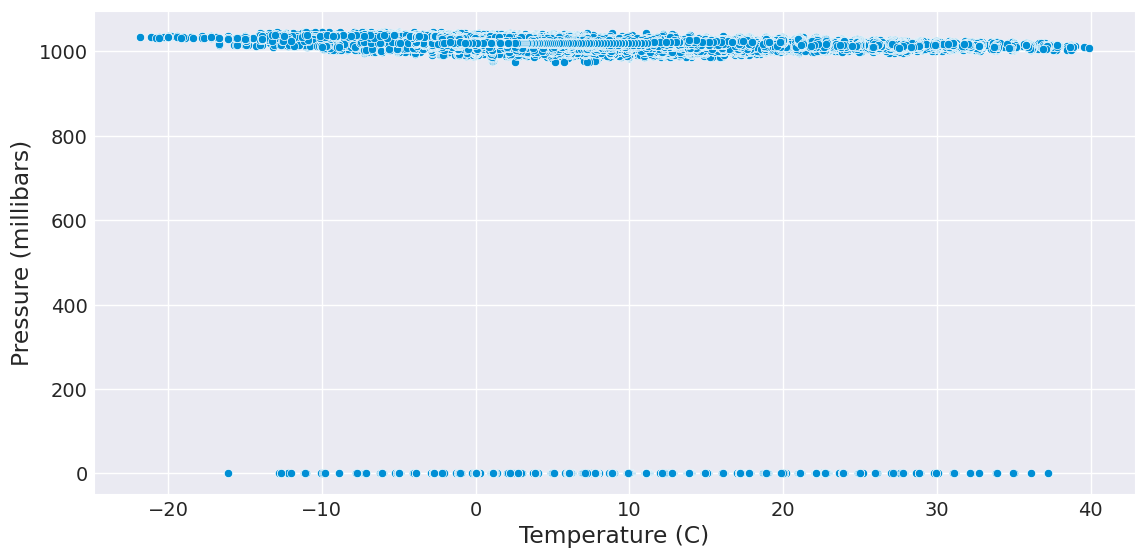

In [ ]:
# Plot the anomalies using Seaborn
sns.set_style("darkgrid")
sns.scatterplot(data=df, x='Temperature (C)', y='Pressure (millibars)')
sns.scatterplot(data=anomalies, x='Temperature (C)', y='Pressure (millibars)', color='red')


Finally, we plot the anomalies using Seaborn, highlighting them in red on top of the original data points.



Here are four different anomaly detection techniques applied to the given dataset

# **1. Isolation Forest**

Isolation Forest is an unsupervised machine learning algorithm that identifies anomalies in data by isolating them into individual trees.

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# Extract features
features = ['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Humidity']
X = df[features]

In [ ]:
# Train model
model = IsolationForest(contamination=0.05)
model.fit(X)


IsolationForest(contamination=0.05)

In [ ]:
# Predict anomalies
df['anomaly_score'] = model.decision_function(X)
df['anomaly'] = model.predict(X)

<Axes: xlabel='Temperature (C)', ylabel='Humidity'>

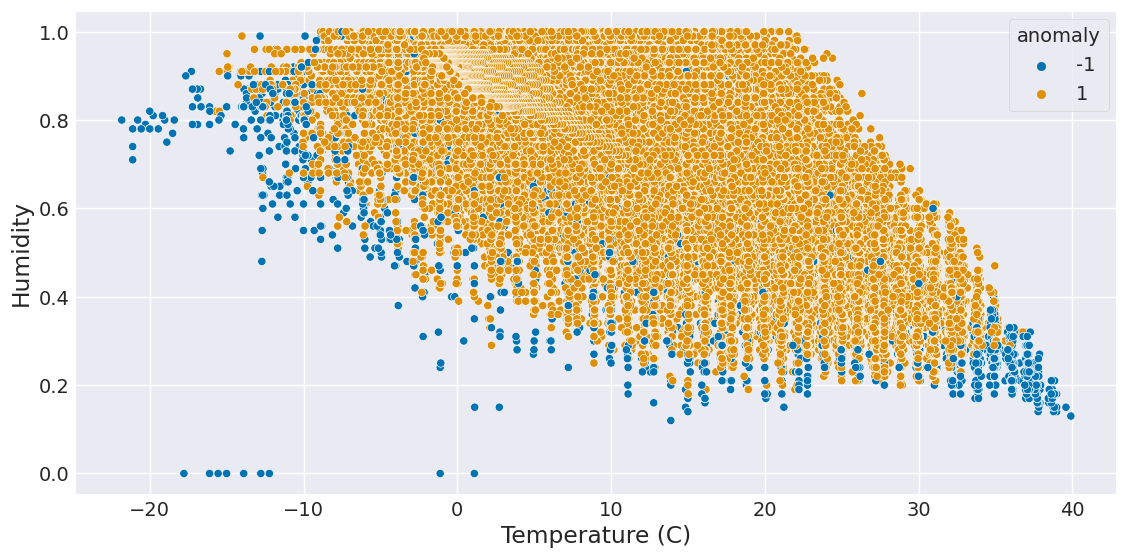

In [ ]:
# Visualize anomalies
sns.scatterplot(data=df, x='Temperature (C)', y='Humidity', hue='anomaly', palette='colorblind')


# **2. Local Outlier Factor**

Local Outlier Factor (LOF) is a density-based anomaly detection algorithm that identifies anomalies based on how isolated they are from the majority of the data points.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

<Axes: xlabel='Pressure (millibars)', ylabel='Wind Speed (km/h)'>

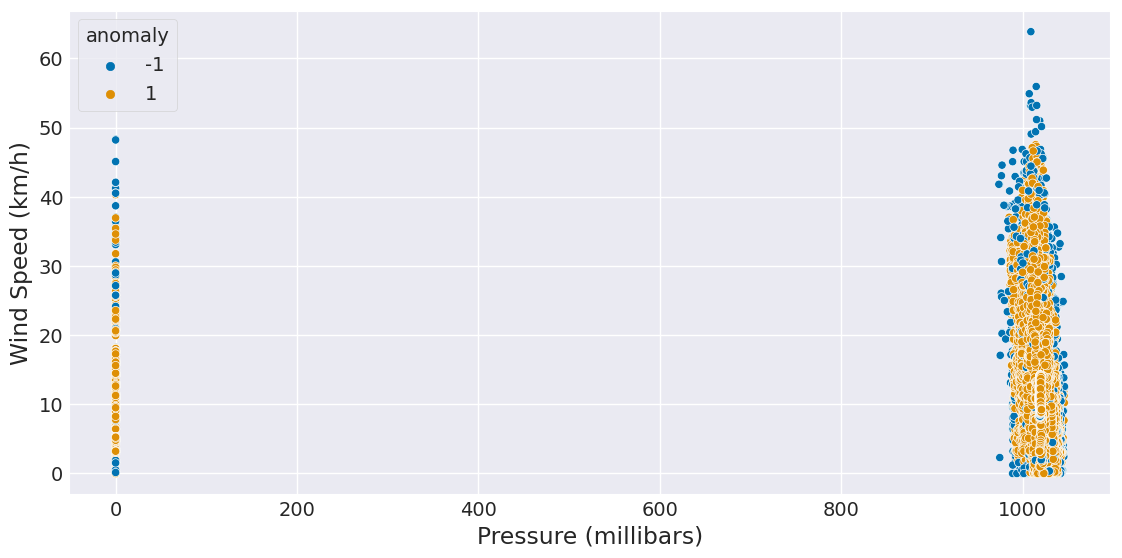

In [ ]:
# Extract features
features = ['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Humidity']
X = df[features]

# Train model
model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
model.fit(X)

# Predict anomalies
df['anomaly_score'] = model.negative_outlier_factor_
df['anomaly'] = model.fit_predict(X)

# Visualize anomalies
sns.scatterplot(data=df, x='Pressure (millibars)', y='Wind Speed (km/h)', hue='anomaly', palette='colorblind')

# **3. One-Class SVM**

One-Class SVM is a machine learning algorithm that identifies anomalies by fitting a model to the majority of the data and identifying points that are unlikely to belong to that model.



In [ ]:
from sklearn.svm import OneClassSVM


<Axes: xlabel='Temperature (C)', ylabel='Wind Speed (km/h)'>

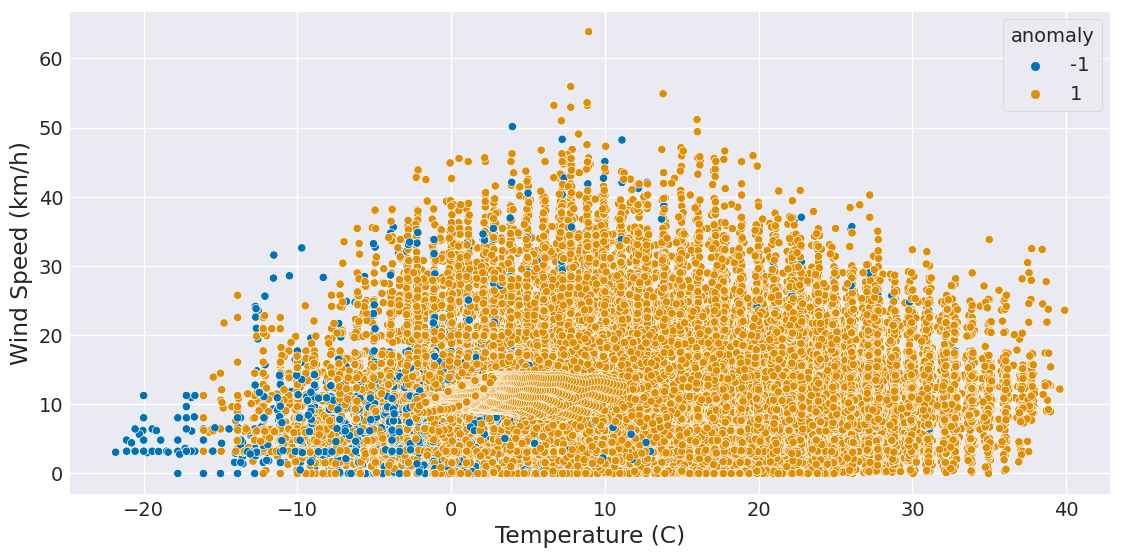

In [ ]:
# Train model
model = OneClassSVM(nu=0.05)
model.fit(X)

# Predict anomalies
df['anomaly_score'] = model.decision_function(X)
df['anomaly'] = model.predict(X)

# Visualize anomalies
sns.scatterplot(data=df, x='Temperature (C)', y='Wind Speed (km/h)', hue='anomaly', palette='colorblind')

# **4. K-Means Clustering**

K-Means Clustering is an unsupervised machine learning algorithm that identifies anomalies by clustering data points together and identifying points that do not fit well into any cluster.

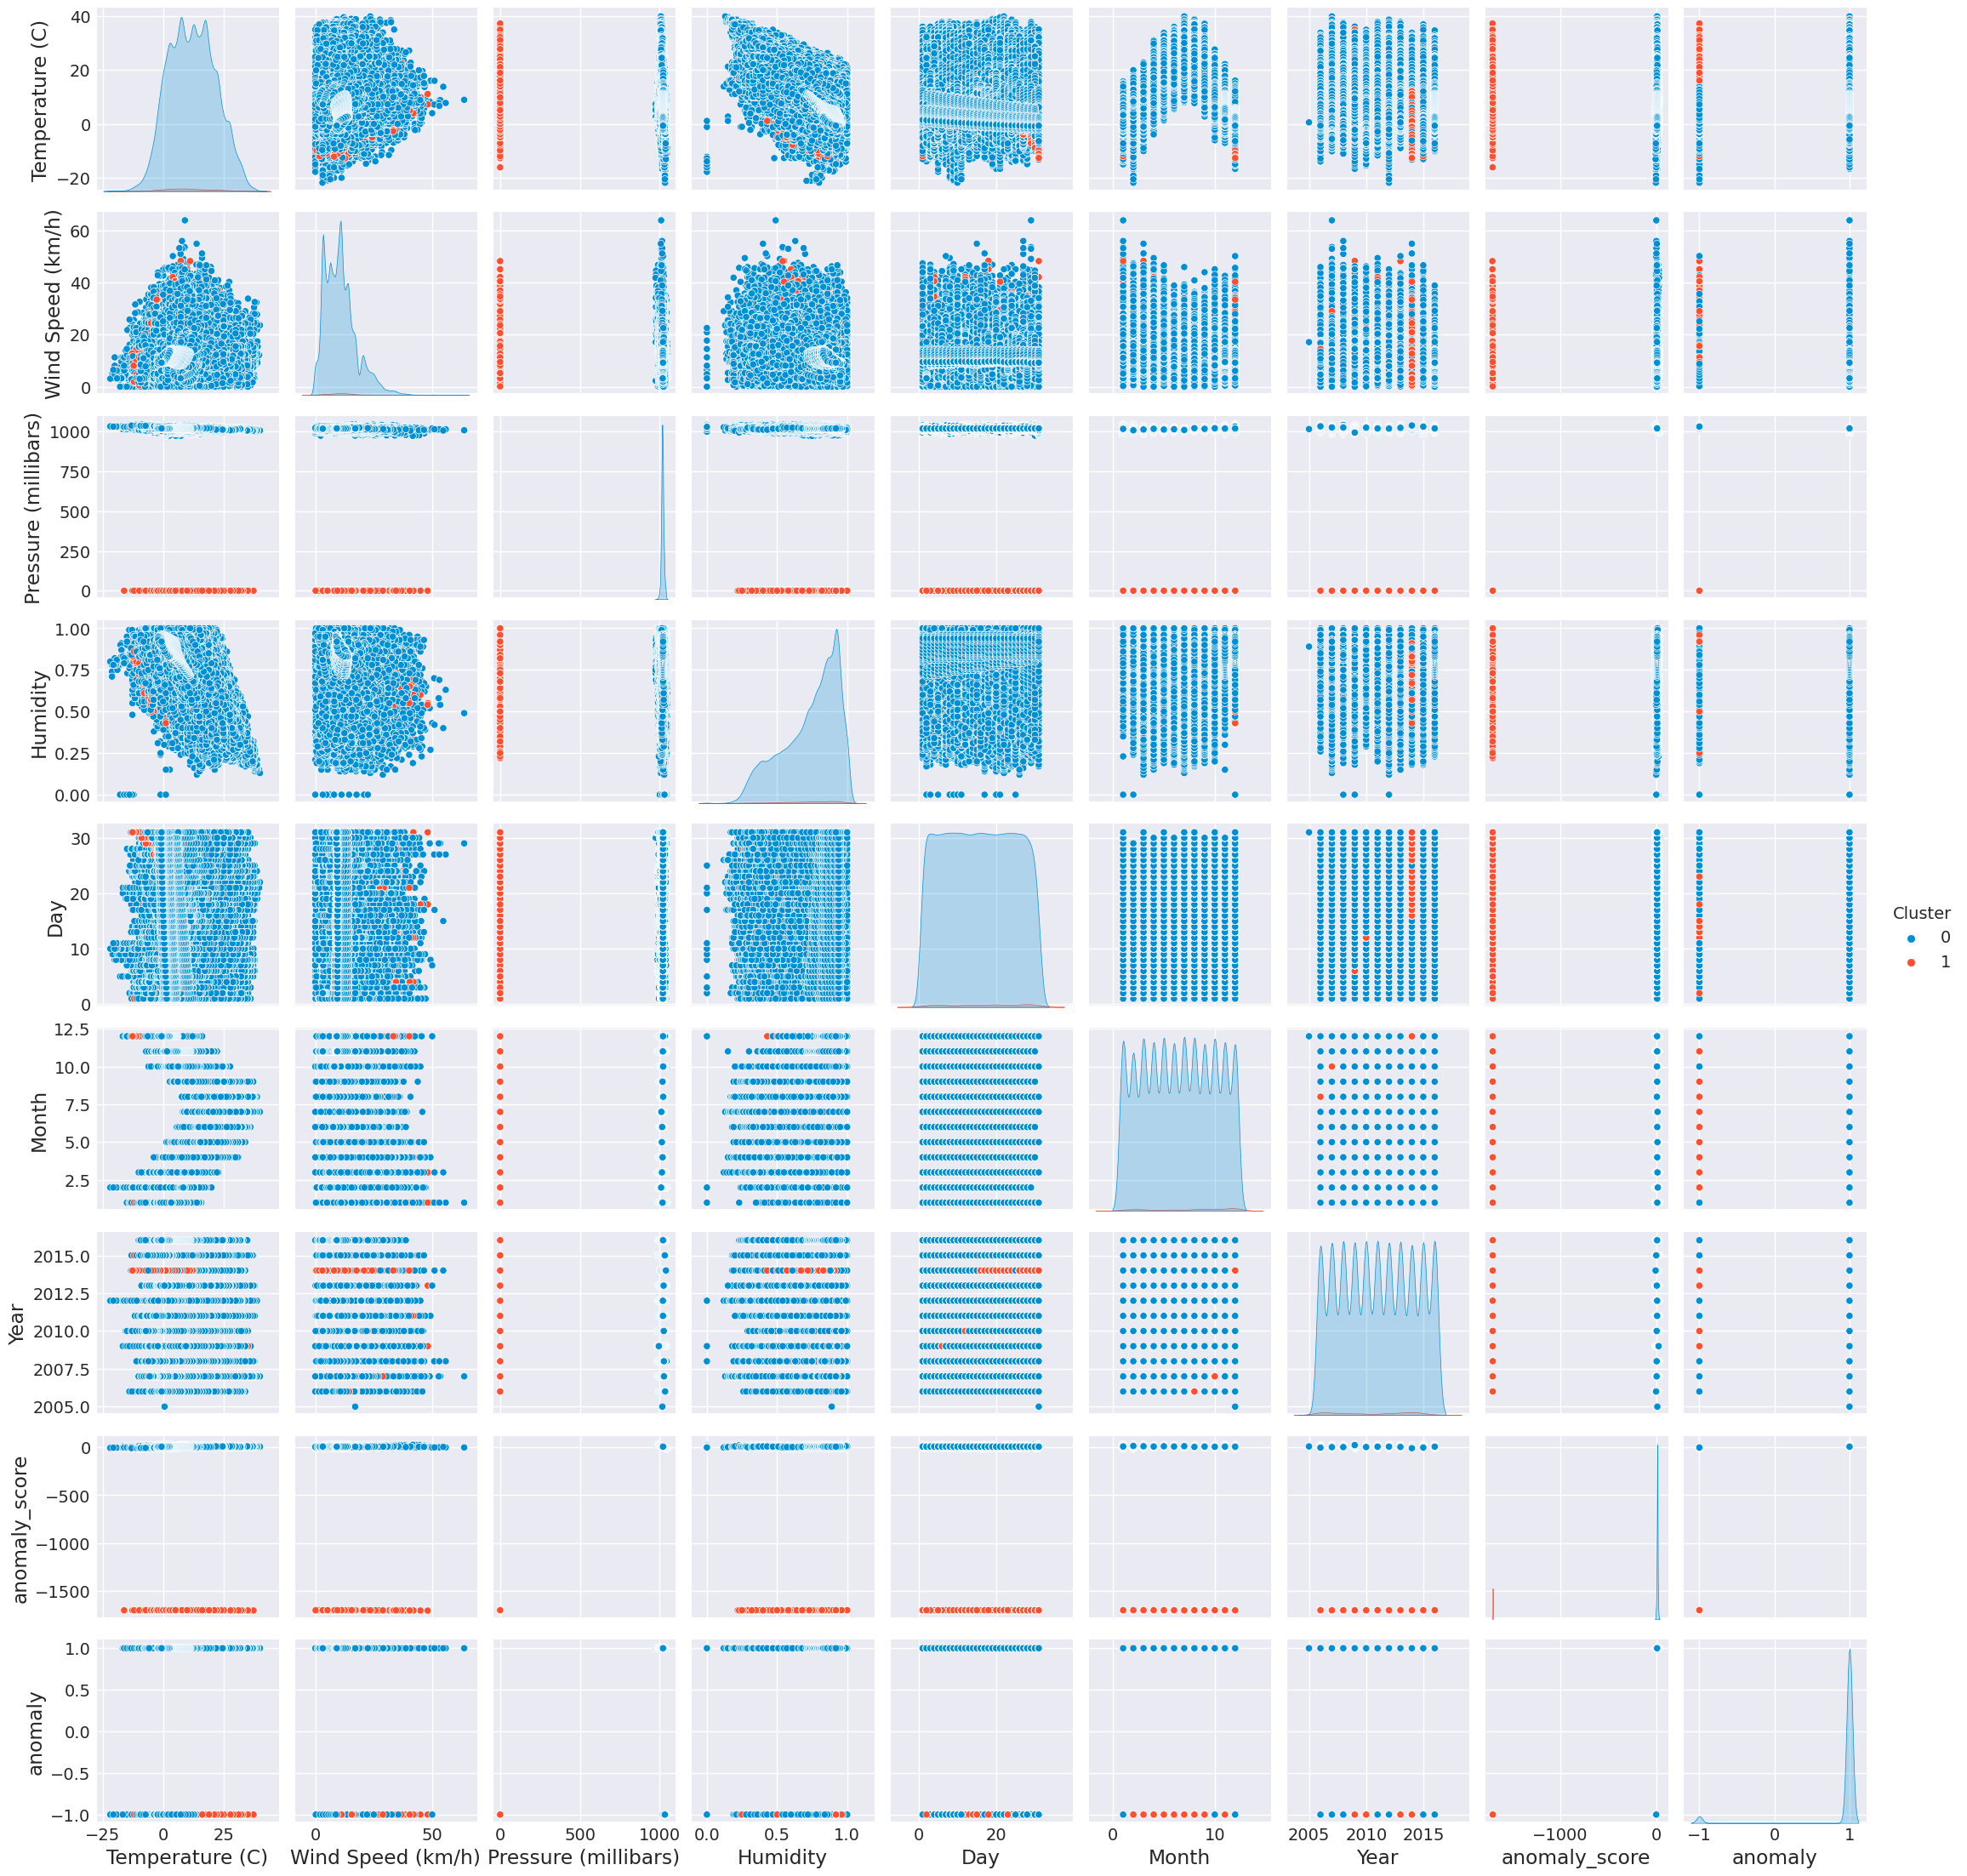

In [ ]:
from sklearn.cluster import KMeans
# Select the relevant features
X = df[['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Humidity']]

# Initialize the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model on the data
kmeans.fit(X)

# Add the predicted cluster labels to the dataframe
df['Cluster'] = kmeans.predict(X)

# Visualize the results
sns.pairplot(df, hue='Cluster')

We then initialize the KMeans model with 2 clusters and fit it on the data. The predicted cluster labels are added to the dataframe and the results are visualized using seaborn pairplot. 